Shape of the DataFrame: (944, 11)

Data Types:
popul       float64
TVnews      float64
selfLR      float64
ClinLR      float64
DoleLR      float64
PID         float64
age         float64
educ        float64
income      float64
vote        float64
logpopul    float64
dtype: object

Summary Statistics:
             popul      TVnews      selfLR      ClinLR      DoleLR  \
count   944.000000  944.000000  944.000000  944.000000  944.000000   
mean    306.381356    3.727754    4.325212    2.939619    5.394068   
std    1082.606745    2.677235    1.438436    1.383725    1.269349   
min       0.000000    0.000000    1.000000    1.000000    1.000000   
25%       1.000000    1.000000    3.000000    2.000000    5.000000   
50%      22.000000    3.000000    4.000000    3.000000    6.000000   
75%     110.000000    7.000000    6.000000    4.000000    6.000000   
max    7300.000000    7.000000    7.000000    7.000000    7.000000   

              PID         age        educ      income        vote  

<Figure size 1500x800 with 0 Axes>

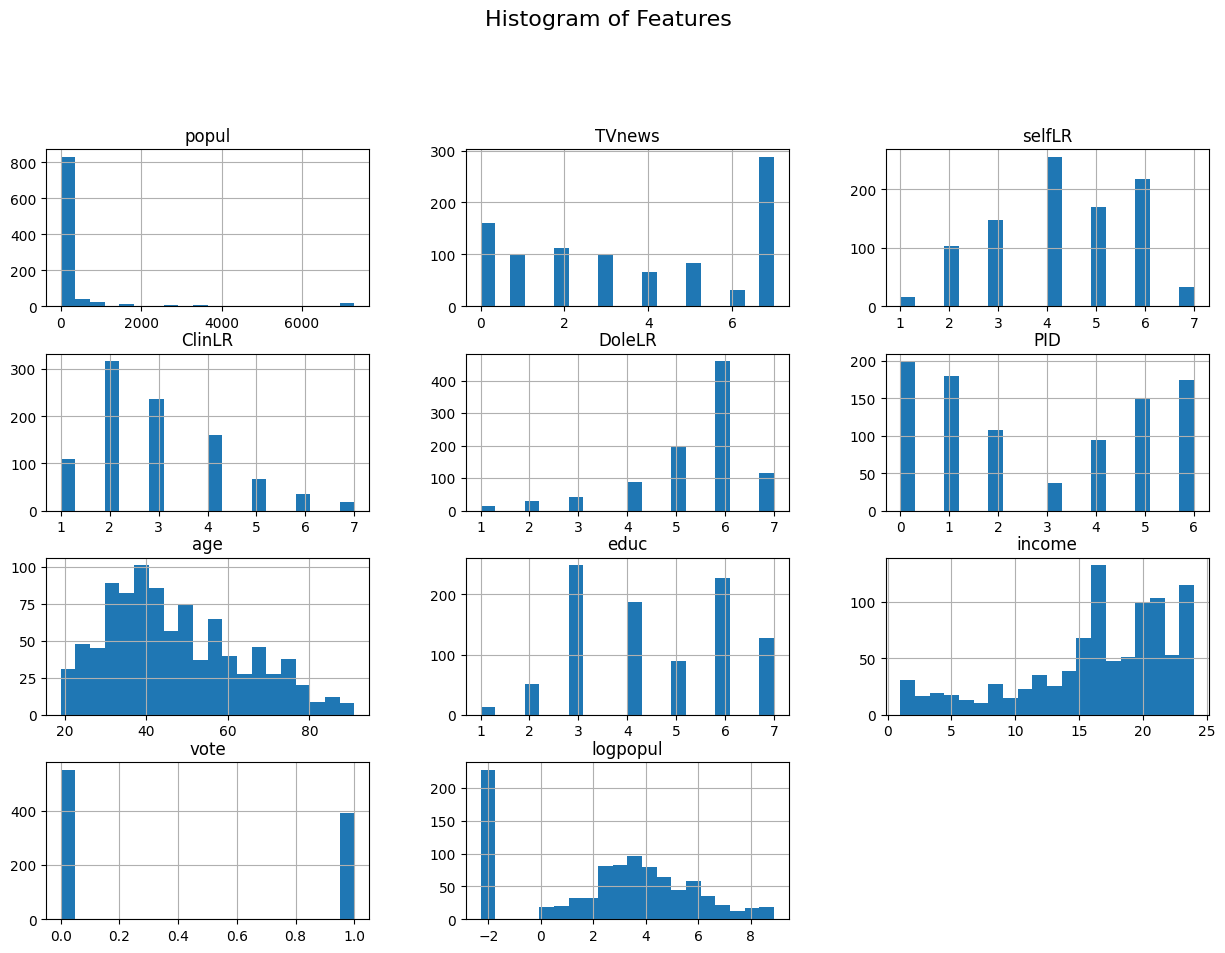

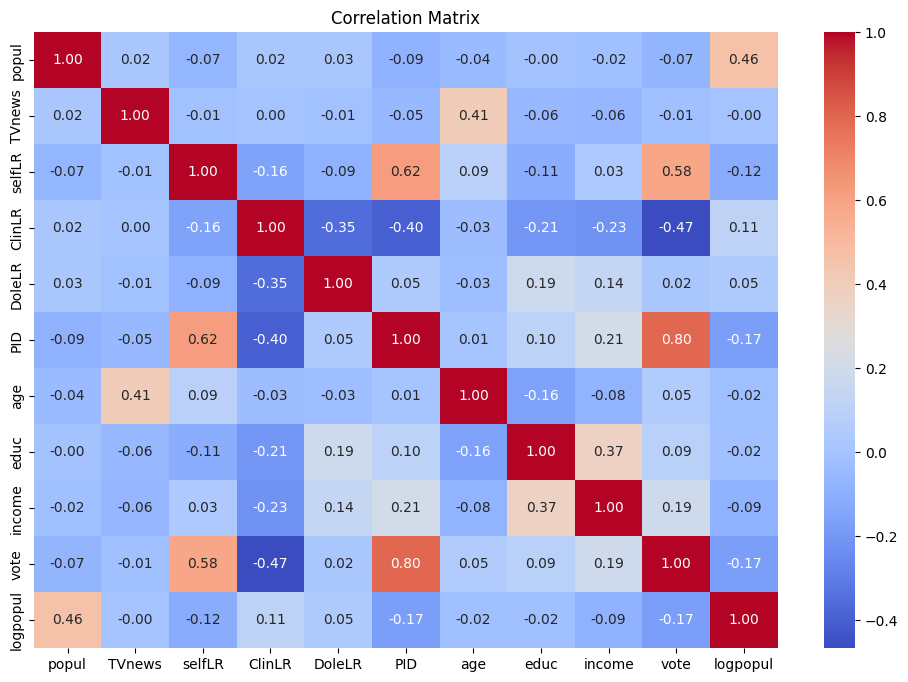


Hypothesis Test for Population:
 t-statistic: 6.916175353002193e-15
 p-value: 0.9999999999999944

Chi-square Test for TVnews:
 chi2-statistic: 0.0
 p-value: 1.0

Hypothesis Test for Age:
 t-statistic: 21.769187665152913
 p-value: 8.823841410048741e-47

Chi-square Test for Education:
 chi2-statistic: 0.0
 p-value: 1.0

Hypothesis Test for Income:
 t-statistic: 8.411949599836055
 p-value: 7.359354037577862e-11

Chi-square Test for Income and Votes:
 chi2-statistic: 0.0
 p-value: 1.0

Fisher's Exact Test for Age and Votes:
 Odds Ratio: 0.9887152777777778
 p-value: 0.9461435054728672
Column Names: Index(['popul', 'TVnews', 'selfLR', 'ClinLR', 'DoleLR', 'PID', 'age', 'educ',
       'income', 'vote', 'logpopul'],
      dtype='object')

Welch's t-test for Education and Votes:
 t-statistic: nan
 p-value: nan


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import chi2_contingency, fisher_exact, ttest_ind

# Load the American National Election Studies of 1996 dataset
anes96 = sm.datasets.anes96
df = anes96.load_pandas().data

# 1. Exploratory Data Analysis (EDA)
# Check the shape, data types, min/max values, etc.
print("Shape of the DataFrame:", df.shape)
print("\nData Types:")
print(df.dtypes)
print("\nSummary Statistics:")
print(df.describe())

# 2. Visualize the histogram of all features and the correlation matrix
plt.figure(figsize=(15, 8))

# Histograms
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histogram of Features', y=1.02, fontsize=16)
plt.show()

# Correlation Matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# 3. Hypothesis testing methods on votes (0: Clinton, 1: Dole)
# a. Population
population_votes = df['vote']
population_mean = population_votes.mean()
t_stat_population, p_value_population = ttest_ind(population_votes, np.full_like(population_votes, population_mean))
print(f"\nHypothesis Test for Population:\n t-statistic: {t_stat_population}\n p-value: {p_value_population}")

# b. TVnews
tvnews_votes = df.groupby('TVnews')['vote'].mean()
chi2_stat_tvnews, p_value_tvnews, _, _ = chi2_contingency(tvnews_votes.values.reshape(1, -1))
print(f"\nChi-square Test for TVnews:\n chi2-statistic: {chi2_stat_tvnews}\n p-value: {p_value_tvnews}")

# c. Age
age_votes = df.groupby('age')['vote'].mean().reset_index()
t_stat_age, p_value_age = ttest_ind(age_votes['age'], age_votes['vote'])
print(f"\nHypothesis Test for Age:\n t-statistic: {t_stat_age}\n p-value: {p_value_age}")


# Check the column names in the DataFrame
print("Column Names:", df.columns)

# d. Education
education_votes = df.groupby('educ')['vote'].mean()
chi2_stat_education, p_value_education, _, _ = chi2_contingency(education_votes.values.reshape(1, -1))
print(f"\nChi-square Test for Education:\n chi2-statistic: {chi2_stat_education}\n p-value: {p_value_education}")




# e. Income
income_votes = df.groupby('income')['vote'].mean().reset_index()
t_stat_income, p_value_income = ttest_ind(income_votes['income'], income_votes['vote'])
print(f"\nHypothesis Test for Income:\n t-statistic: {t_stat_income}\n p-value: {p_value_income}")


# 4. Chi-square test of independence for income and votes
contingency_table_income = pd.crosstab(df['income'] < 50000, df['vote'])
chi2_stat_income_vote, p_value_income_vote, _, _ = chi2_contingency(contingency_table_income)
print(f"\nChi-square Test for Income and Votes:\n chi2-statistic: {chi2_stat_income_vote}\n p-value: {p_value_income_vote}")

# 5. Fisher's exact test for age and votes
contingency_table_age = pd.crosstab(df['age'] < 40, df['vote'])
odds_ratio_age_vote, p_value_age_vote = fisher_exact(contingency_table_age)
print(f"\nFisher's Exact Test for Age and Votes:\n Odds Ratio: {odds_ratio_age_vote}\n p-value: {p_value_age_vote}")

# Check the column names in the DataFrame
print("Column Names:", df.columns)

# 6. Welch's t-test for education and votes
from scipy.stats import ttest_ind

# 6. Welch's t-test for education and votes
education_higher = df[df['educ'].isin(['College degree', 'Some college', 'Post-undergraduate'])]['vote']
education_lower = df[~df['educ'].isin(['College degree', 'Some college', 'Post-undergraduate'])]['vote']


t_stat_education_vote, p_value_education_vote = ttest_ind(education_higher, education_lower, equal_var=False)
print(f"\nWelch's t-test for Education and Votes:\n t-statistic: {t_stat_education_vote}\n p-value: {p_value_education_vote}")




Shape of the DataFrame: (944, 11)

Data Types:
popul       float64
TVnews      float64
selfLR      float64
ClinLR      float64
DoleLR      float64
PID         float64
age         float64
educ        float64
income      float64
vote        float64
logpopul    float64
dtype: object

Summary Statistics:
             popul      TVnews      selfLR      ClinLR      DoleLR  \
count   944.000000  944.000000  944.000000  944.000000  944.000000   
mean    306.381356    3.727754    4.325212    2.939619    5.394068   
std    1082.606745    2.677235    1.438436    1.383725    1.269349   
min       0.000000    0.000000    1.000000    1.000000    1.000000   
25%       1.000000    1.000000    3.000000    2.000000    5.000000   
50%      22.000000    3.000000    4.000000    3.000000    6.000000   
75%     110.000000    7.000000    6.000000    4.000000    6.000000   
max    7300.000000    7.000000    7.000000    7.000000    7.000000   

              PID         age        educ      income        vote  

<Figure size 1500x800 with 0 Axes>

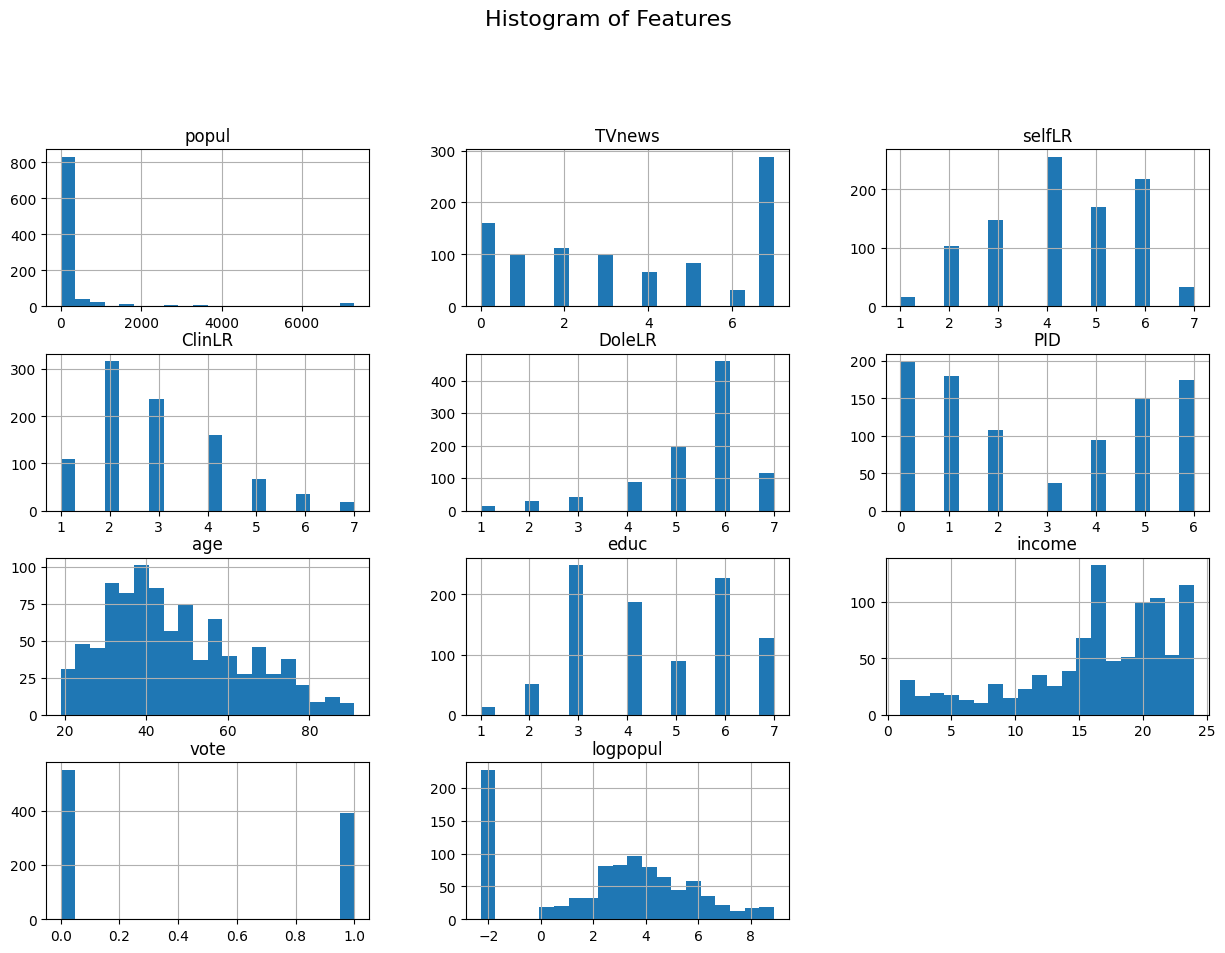

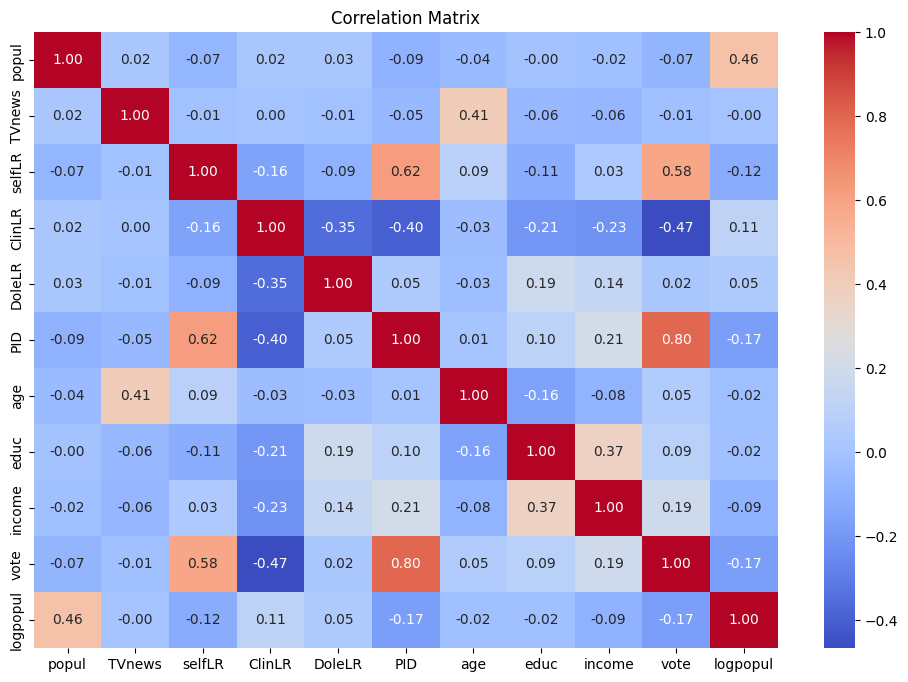


Hypothesis Test for Population:
 t-statistic: 6.916175353002193e-15
 p-value: 0.9999999999999944

Chi-square Test for TVnews:
 chi2-statistic: 0.0
 p-value: 1.0

Hypothesis Test for Age:
 t-statistic: 21.769187665152913
 p-value: 8.823841410048741e-47

Chi-square Test for Education:
 chi2-statistic: 0.0
 p-value: 1.0

Hypothesis Test for Income:
 t-statistic: 8.411949599836055
 p-value: 7.359354037577862e-11

Chi-square Test for Income and Votes:
 chi2-statistic: 0.0
 p-value: 1.0

Fisher's Exact Test for Age and Votes:
 Odds Ratio: 0.9887152777777778
 p-value: 0.9461435054728672
Column Names: Index(['popul', 'TVnews', 'selfLR', 'ClinLR', 'DoleLR', 'PID', 'age', 'educ',
       'income', 'vote', 'logpopul'],
      dtype='object')

Welch's t-test for Education and Votes:
 t-statistic: nan
 p-value: nan


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [26]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import chi2_contingency, fisher_exact, ttest_ind

# Load the American National Election Studies of 1996 dataset
anes96 = sm.datasets.anes96
df = anes96.load_pandas().data

# 1. Exploratory Data Analysis (EDA)
# Check the shape, data types, min/max values, etc.
print("Shape of the DataFrame:", df.shape)
print("\nData Types:")
print(df.dtypes)
print("\nSummary Statistics:")
print(df.describe())

# 2. Visualize the histogram of all features and the correlation matrix
plt.figure(figsize=(15, 8))

# Histograms
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histogram of Features', y=1.02, fontsize=16)
plt.show()

# Correlation Matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# 3. Hypothesis testing methods on votes (0: Clinton, 1: Dole)
# a. Population
population_votes = df['vote']
population_mean = population_votes.mean()
t_stat_population, p_value_population = ttest_ind(population_votes, np.full_like(population_votes, population_mean))
print(f"\nHypothesis Test for Population:\n t-statistic: {t_stat_population}\n p-value: {p_value_population}")

# b. TVnews
tvnews_votes = df.groupby('TVnews')['vote'].mean()
chi2_stat_tvnews, p_value_tvnews, _, _ = chi2_contingency(tvnews_votes.values.reshape(1, -1))
print(f"\nChi-square Test for TVnews:\n chi2-statistic: {chi2_stat_tvnews}\n p-value: {p_value_tvnews}")

# c. Age
age_votes = df.groupby('age')['vote'].mean().reset_index()
t_stat_age, p_value_age = ttest_ind(age_votes['age'], age_votes['vote'])
print(f"\nHypothesis Test for Age:\n t-statistic: {t_stat_age}\n p-value: {p_value_age}")

# d. Education
education_votes = df.groupby('educ')['vote'].mean()
chi2_stat_education, p_value_education, _, _ = chi2_contingency(education_votes.values.reshape(1, -1))
print(f"\nChi-square Test for Education:\n chi2-statistic: {chi2_stat_education}\n p-value: {p_value_education}")

# e. Income
income_votes = df.groupby('income')['vote'].mean().reset_index()
t_stat_income, p_value_income = ttest_ind(income_votes['income'], income_votes['vote'])
print(f"\nHypothesis Test for Income:\n t-statistic: {t_stat_income}\n p-value: {p_value_income}")

# 4. Chi-square test of independence for income and votes
contingency_table_income = pd.crosstab(df['income'] < 50000, df['vote'])
chi2_stat_income_vote, p_value_income_vote, _, _ = chi2_contingency(contingency_table_income)
print(f"\nChi-square Test for Income and Votes:\n chi2-statistic: {chi2_stat_income_vote}\n p-value: {p_value_income_vote}")

# 5. Fisher's exact test for age and votes
contingency_table_age = pd.crosstab(df['age'] < 40, df['vote'])
odds_ratio_age_vote, p_value_age_vote = fisher_exact(contingency_table_age)
print(f"\nFisher's Exact Test for Age and Votes:\n Odds Ratio: {odds_ratio_age_vote}\n p-value: {p_value_age_vote}")

# Check the column names in the DataFrame
print("Column Names:", df.columns)

# 6. Welch's t-test for education and votes
education_higher = df[df['educ'].isin(['College degree', 'Some college', 'Post-undergraduate'])]['vote']
education_lower = df[~df['educ'].isin(['College degree', 'Some college', 'Post-undergraduate'])]['vote']

t_stat_education_vote, p_value_education_vote = ttest_ind(education_higher, education_lower, equal_var=False)
print(f"\nWelch's t-test for Education and Votes:\n t-statistic: {t_stat_education_vote}\n p-value: {p_value_education_vote}")
